Public Key: (5, 19879)
Private Key: (3917, 19879)


Enter the message to encrypt:  45476586578


Encrypted Message: [18157, 970, 18157, 7732, 19761, 970, 3960, 19761, 970, 7732, 3960]
Decrypted Message: 45476586578


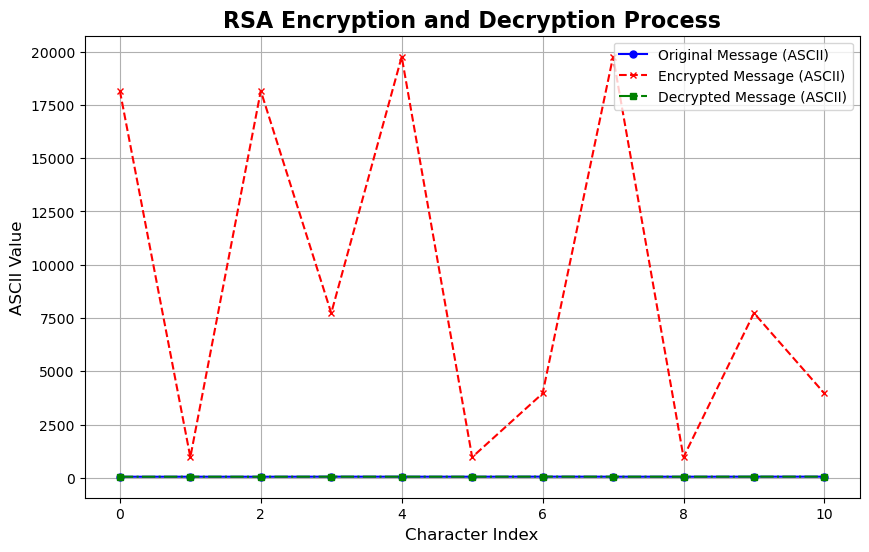

In [1]:
import random
import math
import matplotlib.pyplot as plt

# ফাংশন যা একটি সংখ্যা প্রাইম কিনা চেক করবে
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

# একটি র্যান্ডম প্রাইম নাম্বার তৈরি করার ফাংশন
def generate_prime(min_num, max_num):
    while True:
        num = random.randint(min_num, max_num)
        if is_prime(num):
            return num

# GCD (Greatest Common Divisor) বের করার ফাংশন
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a

# মডুলার ইনভার্স বের করার ফাংশন
def mod_inverse(a, m):
    m0, x0, x1 = m, 0, 1
    if m == 1:
        return 0
    while a > 1:
        q = a // m
        m, a = a % m, m
        x0, x1 = x1 - q * x0, x0
    if x1 < 0:
        x1 += m0
    return x1

# RSA কী জেনারেশন
def generate_rsa_keys(min_num, max_num):
    p = generate_prime(min_num, max_num)
    q = generate_prime(min_num, max_num)
    n = p * q
    phi = (p - 1) * (q - 1)

    e = 2
    while e < phi:
        if gcd(e, phi) == 1:
            break
        e += 1

    d = mod_inverse(e, phi)
    
    # পাবলিক কি (e, n), প্রাইভেট কি (d, n)
    return ((e, n), (d, n))

# পাবলিক কি ব্যবহার করে মেসেজ এনক্রিপ্ট করা
def encrypt(public_key, message):
    e, n = public_key
    encrypted_message = [pow(ord(char), e, n) for char in message]
    return encrypted_message

# প্রাইভেট কি ব্যবহার করে মেসেজ ডিক্রিপ্ট করা
def decrypt(private_key, encrypted_message):
    d, n = private_key
    decrypted_message = ''.join([chr(pow(char, d, n)) for char in encrypted_message])
    return decrypted_message

# মেসেজের ASCII ভ্যালু প্লট করা
def plot_message_changes(original_message, encrypted_message, decrypted_message):
    # ASCII ভ্যালু বের করা
    original_ascii = [ord(char) for char in original_message]
    encrypted_ascii = encrypted_message
    decrypted_ascii = [ord(char) for char in decrypted_message]
    
    # গ্রাফ তৈরি করা
    plt.figure(figsize=(10, 6))
    plt.plot(original_ascii, label="Original Message (ASCII)", marker='o', color='blue', linestyle='-', markersize=5)
    plt.plot(encrypted_ascii, label="Encrypted Message (ASCII)", marker='x', color='red', linestyle='--', markersize=5)
    plt.plot(decrypted_ascii, label="Decrypted Message (ASCII)", marker='s', color='green', linestyle='-.', markersize=5)
    
    # গ্রাফের লেবেল ও টাইটেল
    plt.title('RSA Encryption and Decryption Process', fontsize=16, fontweight='bold')
    plt.xlabel('Character Index', fontsize=12)
    plt.ylabel('ASCII Value', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# মেইন ফাংশন যা এনক্রিপশন এবং ডিক্রিপশন পরিচালনা করবে
def rsa_simulation():
    min_num = 100  # প্রাইম নাম্বার জেনারেশনের জন্য মিনিমাম মান
    max_num = 200  # প্রাইম নাম্বার জেনারেশনের জন্য ম্যাক্সিমাম মান
    
    # পাবলিক এবং প্রাইভেট কী জেনারেশন
    public_key, private_key = generate_rsa_keys(min_num, max_num)
    
    print(f"Public Key: {public_key}")
    print(f"Private Key: {private_key}")
    
    # ইউজার থেকে মেসেজ ইনপুট নেয়া
    message = input("Enter the message to encrypt: ")
    
    # মেসেজ এনক্রিপ্ট করা
    encrypted_message = encrypt(public_key, message)
    print(f"Encrypted Message: {encrypted_message}")
    
    # মেসেজ ডিক্রিপ্ট করা
    decrypted_message = decrypt(private_key, encrypted_message)
    print(f"Decrypted Message: {decrypted_message}")
    
    # এনক্রিপশন এবং ডিক্রিপশন প্রক্রিয়া প্লট করা
    plot_message_changes(message, encrypted_message, decrypted_message)

# RSA সিমুলেশন চালানো
rsa_simulation()
